### templates
In some of the other examples it was assumed that a template for the model atmosphere was available somewhere on the machine locally.
However, we can also just download one given values for $T_\mathrm{eff}$, $\log g$, and $\rm [Fe/H]$ (...and $[\alpha/\mathrm{Fe}]$).

In [1]:
## Load the FIESpipe module
## and matplotlib for plotting
%matplotlib inline
import FIESpipe as fp
import matplotlib.pyplot as plt

Again we'll be using the ATLAS9/Kurucz available [here](http://130.79.128.5/ftp/more/splib120/).

In [2]:
## Here we get the Kurucz model
## for a star with Teff=5500 K, logg=3.5, [Fe/H]=-1.1231, [alpha/Fe]=0.0
file = fp.getKurucz(5500, logg=3.5, feh=-1.1231, alpha=0.0)
## And as in the previous examples, we read the file
twl, tfl = fp.readKurucz(file)

Text(0, 0.5, '$F_\\lambda$')

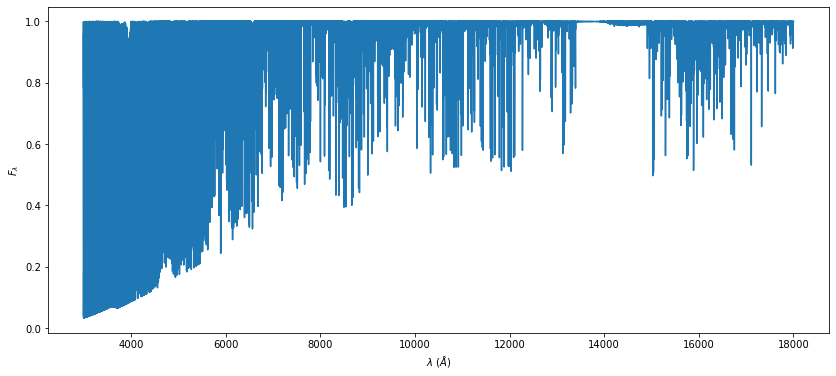

In [3]:
## Let's plot the spectrum
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(twl, tfl)
ax.set_xlabel(r'$\lambda \ (\AA)$')
ax.set_ylabel(r'$F_\lambda$')

We can also use a PHOENIX template instead avaliable [here](http://phoenix.astro.physik.uni-goettingen.de/).
The wavelength for the PHOENIX template comes in a separate file, which will be downloaded in the same instance below.

In [4]:
## Here we get the Phoenix model
## for a star with Teff=5757 K, logg=3.8, [Fe/H]=-0.5, [alpha/Fe]=0.2
specfile, wavefile = fp.getPhoenix(5757,logg=3.8,feh=-0.5,alpha=0.2)
## Now we read the files
## We'll only read the wavelength range 5600-6800 Å
twl, tfl = fp.readPhoenix(specfile,wavefile,wl_min=5600,wl_max=6400)

Text(0, 0.5, '$F_\\lambda$')

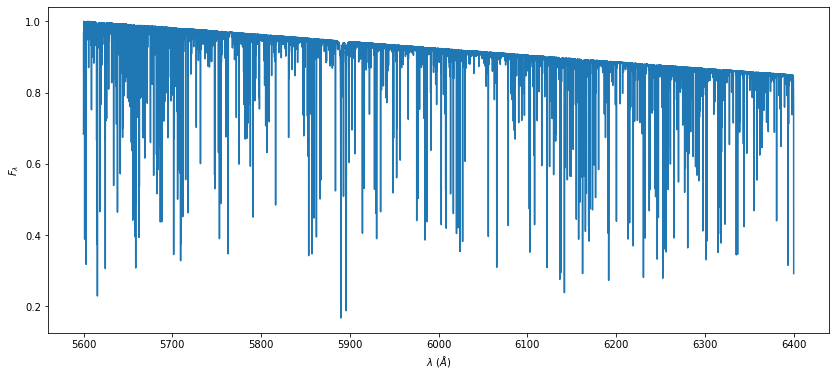

In [5]:
## And plot the spectrum
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(twl, tfl)
ax.set_xlabel(r'$\lambda \ (\AA)$')
ax.set_ylabel(r'$F_\lambda$')

Evidently, this spectrum isn't normalized. We can do this through continuum normalization using a max filter.
This works best by grabbing chunks (as above) of the spectrum and not over the full wavelength range of the spectrum.

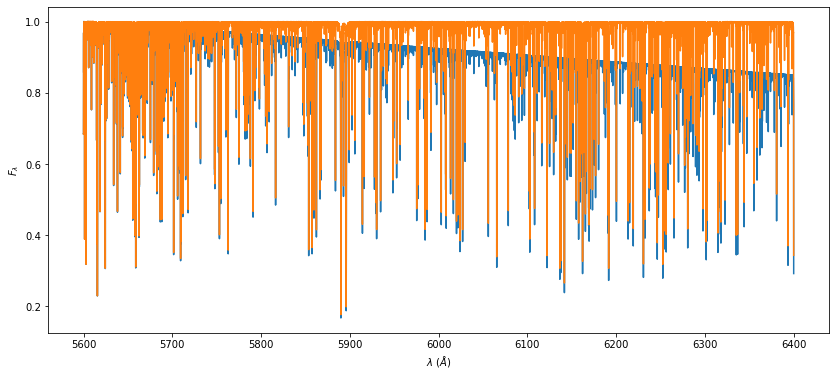

In [6]:
nfl = fp.contNormalize(twl, tfl, bins=100, pdeg=5)
## plot the normalized spectrum
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(twl, tfl)
ax.set_xlabel(r'$\lambda \ (\AA)$')
ax.set_ylabel(r'$F_\lambda$')
ax.plot(twl, nfl)

Any other template ($\lambda,F_\lambda$) can, of course, also be used.